# Customizando gráficos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('reported.csv')

In [4]:
df.head(10)

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
0,1950,2784,2306,120,1,105,40,5,1578,295,...,NaN,NaN,NaN,3,209,72,477,0.0,49,7014000
1,1951,3284,2754,125,1,109,45,6,1899,342,...,NaN,NaN,NaN,3,310,73,530,0.0,66,7073000
2,1952,3160,2608,119,1,104,39,4,1846,372,...,NaN,NaN,NaN,3,217,82,553,0.0,78,7125000
3,1953,2909,2689,119,1,105,45,5,1929,361,...,NaN,NaN,NaN,4,209,88,220,0.0,91,7171000
4,1954,3028,2791,126,1,107,41,5,1981,393,...,NaN,NaN,NaN,4,236,101,237,0.0,103,7213000
5,1955,3357,3101,135,1,118,44,5,2254,459,...,NaN,NaN,NaN,4,236,111,255,0.0,125,7262000
6,1956,3488,3215,133,1,116,38,5,2363,470,...,NaN,NaN,NaN,6,234,133,273,0.0,160,7315000
7,1957,3774,3520,133,1,116,36,5,2635,580,...,245.0,NaN,NaN,6,254,155,255,0.0,163,7364000
8,1958,4064,3791,127,1,113,40,6,2880,724,...,279.0,NaN,NaN,6,254,167,273,1.0,166,7409000
9,1959,4033,3733,125,1,110,47,6,2793,715,...,238.0,NaN,NaN,6,251,179,299,1.0,181,7446000


In [5]:
df.fillna(0, inplace=True)

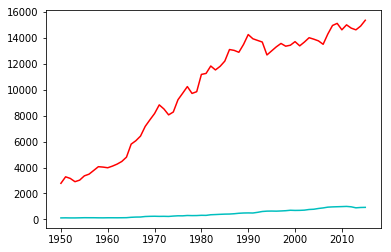

In [7]:
plt.plot(df['Year'],df['crimes.total'],'-r')
plt.plot(df['Year'],df['crimes.person'],'-c')

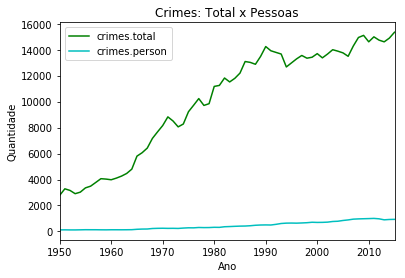

In [21]:
fig, ax = plt.subplots()
ax.plot(df['Year'],df['crimes.total'],'-g')
ax.plot(df['Year'],df['crimes.person'],'-c')
ax.legend(loc='upper left')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Ano')
ax.set_title('Crimes: Total x Pessoas')
ax.set_xlim([df['Year'].min(),df['Year'].max()])
ax.plot()
fig.savefig('grafico_completo.png')

# Gráficos de séries temporais

In [3]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as dates
%matplotlib inline

In [4]:
df = pd.read_csv('ppz-jan-fev-2017.csv')

In [6]:
df.head(10)

,hour,views
0,0,9
1,1,0
2,2,1
3,3,2
4,4,4
5,5,0
6,6,6
7,7,10
8,8,8
9,9,14


In [7]:
df.tail()

,hour,views
1411,1411,55
1412,1412,55
1413,1413,9
1414,1414,39
1415,1415,15


In [8]:
def conv_data(value):
    return dt.datetime(2017,1,1) + dt.timedelta(hours=value)

In [9]:
df['date'] = df['hour'].apply(conv_data)

In [10]:
df.head()

,hour,views,date
0,0,9,2017-01-01 00:00:00
1,1,0,2017-01-01 01:00:00
2,2,1,2017-01-01 02:00:00
3,3,2,2017-01-01 03:00:00
4,4,4,2017-01-01 04:00:00


In [11]:
del df['hour']

In [12]:
df.head()

,views,date
0,9,2017-01-01 00:00:00
1,0,2017-01-01 01:00:00
2,1,2017-01-01 02:00:00
3,2,2017-01-01 03:00:00
4,4,2017-01-01 04:00:00


In [13]:
df.set_index(['date'], inplace=True)

In [14]:
df.head(5)

,views
date,
2017-01-01 00:00:00,9
2017-01-01 01:00:00,0
2017-01-01 02:00:00,1
2017-01-01 03:00:00,2
2017-01-01 04:00:00,4


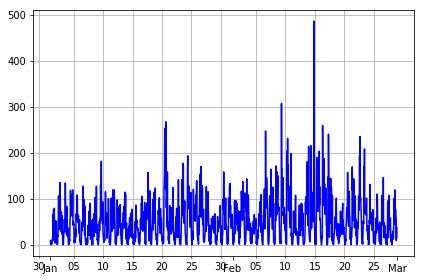

In [17]:
fig, ax = plt.subplots()
ax.plot_date(df.index.to_pydatetime(), df['views'], 'b-')
ax.xaxis.set_minor_locator(dates.DayLocator(bymonthday=range(5, 32, 5)))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
plt.tight_layout()
plt.show()
fig.savefig('grafico_temporal.png')